In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np
import sys
import astropy.units as u
from astropy.io import ascii, fits

In [30]:
f = fits.open('../libra/data/trappist1/spex_sxd-merge_2306-0502_151118.fits')

wavelength = f[0].data[0, :] * u.um
flux = f[0].data[1, :] * u.erg * u.s**-1 * u.cm**-2 * u.Angstrom**-1
flux = flux.to(u.W * u.m**-2 * u.um**-1)
flux[(flux < 0) | np.isnan(flux) | (flux.value > 1.5e-13)] = 0

 ############################## Xspextool History ############################## [astropy.io.fits.card]
 ############################## Xcombspec History ############################## [astropy.io.fits.card]
 ############################### Xtellcor History ############################## [astropy.io.fits.card]
 ############################# Xmergeorders History ############################ [astropy.io.fits.card]
/Users/bmmorris/anaconda/lib/python3.5/site-packages/astropy-3.0.dev19880-py3.5-macosx-10.6-x86_64.egg/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in less
  *arrays, **kwargs)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


(0.1, 3)

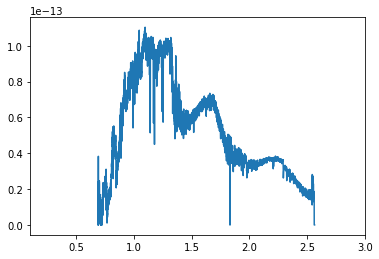

In [43]:
#plt.plot(phoenix_wavelengths, coolstar/coolstar.max())

plt.plot(wavelength, flux)

plt.xlim([0.1, 3])

In [46]:
from synphot import units, SourceSpectrum, Empirical1D, Observation

from synphot import SpectralElement

v = SourceSpectrum.from_vega()

bp_i = SpectralElement.from_filter('cousins_i')
bp_r = SpectralElement.from_filter('cousins_r')

bp_j = SpectralElement.from_file('/Users/bmmorris/git/libra/libra/data/filters/2MASS_2MASS.J.dat.txt')
bp_h = SpectralElement.from_file('/Users/bmmorris/git/libra/libra/data/filters/2MASS_2MASS.H.dat.txt')
bp_k = SpectralElement.from_file('/Users/bmmorris/git/libra/libra/data/filters/2MASS_2MASS.Ks.dat.txt')

sp = SourceSpectrum(Empirical1D, points=wavelength.to(u.Angstrom), lookup_table=flux)

force = 'taper'
obs_r = Observation(sp, bp_r, force=force)
obs_i = Observation(sp, bp_i, force=force)

obs_j = Observation(sp, bp_j, force=force)
obs_h = Observation(sp, bp_h, force=force)
obs_k = Observation(sp, bp_k, force=force)

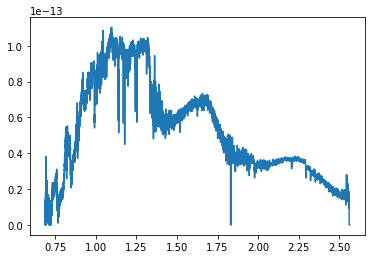

In [47]:
plt.plot(wavelength, flux)

In [52]:
R = 16.6 
I = 14.0
J = 11.354 
H = 10.718 
K = 10.296 
print(J-H, J-K)

0.6359999999999992 1.0579999999999998


In [53]:
#obs_r.effstim('vegamag', vegaspec=v) - obs_i.effstim('vegamag', vegaspec=v)

In [56]:
obs_j.effstim('vegamag', vegaspec=v) - obs_h.effstim('vegamag', vegaspec=v)

<Quantity 0.6476819770669398 VEGAMAG>

In [55]:
obs_j.effstim('vegamag', vegaspec=v) - obs_k.effstim('vegamag', vegaspec=v)

<Quantity 1.0786874887606412 VEGAMAG>